This notebook is a demonstration of the entire Machine Translation pipeline (although we are trying to transliterate).

It goes through the pre-processing of data all the way to outputting a model that can be re-used later on. It even performs some basic evaluation namely plotting training and validation loss.

Works best on Japanese ('ja') as the Twitter data used contains higher portions of Japanese Tweets compared to other languages that are not English. Also the standard transliteration used when evaluating suitable name pairs works very well in Japanese.

This version correctly implements splitting the data into **training, testing and validation**.

In [1]:
language = 'ja'
import name_transliteration.filtering as filter
import name_transliteration.cleansing as cleanse
import name_transliteration.model_trainer_and_tester as model_trainer_and_tester

In [2]:
# filter testing and training data

my_filter = filter.Filter(language)
my_filter.filterData("./data/")

./data/stream-2021-03-07T03:05:07.831679.gz
./data/stream-2021-01-13T01:21:29.804195.gz
./data/stream-2021-01-13T04:07:46.253913.gz
./data/stream-2021-01-12T23:08:30.828340.gz
./data/stream-2021-01-13T03:38:20.383129.gz
./data/stream-2021-03-07T06:30:03.830030.gz
./data/stream-2021-01-13T04:37:35.200990.gz
./data/stream-2021-03-07T03:34:53.811604.gz
./data/stream-2021-04-17T07:23:41.809159.gz
./data/stream-2021-01-12T22:39:33.810384.gz
./data/stream-2021-03-06T03:25:42.946878.gz
./data/stream-2021-01-12T22:09:26.798946.gz
./data/stream-2021-03-07T04:06:04.938654.gz
./data/stream-2021-03-07T01:39:45.126113.gz
./data/stream-2021-03-07T08:30:55.833881.gz
./data/stream-2021-03-07T02:36:22.842559.gz
./data/stream-2021-03-06T01:33:50.975776.gz
./data/stream-2021-03-06T01:59:57.825571.gz
./data/stream-2021-03-07T07:50:03.791977.gz
./data/stream-2021-04-17T04:49:34.818794.gz
./data/stream-2021-03-06T00:38:21.058969.gz
./data/stream-2021-03-07T01:29:37.938029.gz
./data/stream-2021-01-13T00:02:2

In [3]:
# instantiate the cleanser
my_cleanser = cleanse.Cleanser()
# the split data is uncleansed btw
my_cleanser.splitTrainTest(my_filter.getDataFrame())
# this does the cleansing of the test datasets
my_cleanser.createTestDataSets()
# this does the cleansing of the training dataset
my_cleanser.createTrainDataSet(edit_threshold = 0.1)

In [4]:
my_cleanser.saveTestAndTrain()

Saved cleansed names as: 
train_10_edit_distance_language_cleansed.txt 24243 number of rows. 
test1_cleansed.txt 32 number of rows. 
test2_cleansed.txt 47 number of rows. 
test3_cleansed.txt 106 number of rows. 



In [ ]:
trainer_and_tester = model_trainer_and_tester.ModelTrainerAndTester(
    language=language, 
    epochs=20
)
trainer_and_tester.runWholeTrainProcess('train_10_edit_distance_language_cleansed.txt')





from IPython.display import Audio
sound_file = './sound/beep-03.wav'
Audio(sound_file, autoplay=True)

Number of unique input tokens: 27
Number of unique output tokens: 1911
Max sequence length for inputs: 17
Max sequence length for outputs: 13
Epoch 1/20
607/607 [==============================] - 71s 113ms/step - loss: 1.9728 - accuracy: 0.6659 - val_loss: 1.4776 - val_accuracy: 0.7233
Epoch 2/20
607/607 [==============================] - 67s 110ms/step - loss: 1.4051 - accuracy: 0.7339 - val_loss: 1.3034 - val_accuracy: 0.7523
Epoch 3/20
607/607 [==============================] - 67s 110ms/step - loss: 1.1507 - accuracy: 0.7713 - val_loss: 1.0748 - val_accuracy: 0.7867
Epoch 4/20
607/607 [==============================] - 70s 115ms/step - loss: 0.9417 - accuracy: 0.8120 - val_loss: 0.8966 - val_accuracy: 0.8228
Epoch 5/20
607/607 [==============================] - 66s 108ms/step - loss: 0.7988 - accuracy: 0.8423 - val_loss: 0.8029 - val_accuracy: 0.8440
Epoch 6/20
607/607 [==============================] - 68s 112ms/step - loss: 0.7012 - accuracy: 0.8639 - val_loss: 0.7706 - val_accur

In [6]:
trainer_and_tester.predict("miruku")

'みるく\n'

In [7]:
trainer_and_tester.evaluateOnTestData("ja_model_20")


evaluating on test set with 0 edit threshold...
1/1 [==============================] - 1s 570ms/step - loss: 0.5330 - accuracy: 0.8977
test loss, test acc: [0.5329840183258057, 0.8977272510528564]
evaluating on test set with 0.1 edit threshold...
2/2 [==============================] - 1s 17ms/step - loss: 1.0143 - accuracy: 0.8279
test loss, test acc: [1.0143263339996338, 0.8278530240058899]
evaluating on test set with 0.25 edit threshold...
4/4 [==============================] - 0s 21ms/step - loss: 1.2712 - accuracy: 0.8010
test loss, test acc: [1.2712039947509766, 0.8010291457176208]


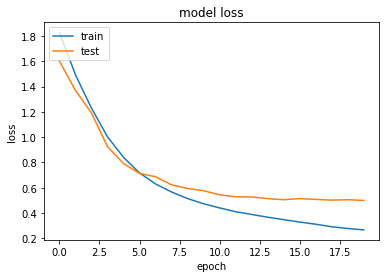

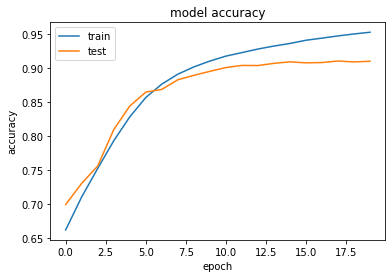

In [8]:
trainer_and_tester.plotLoss()
trainer_and_tester.plotAccuracy()

In [9]:
trainer_and_tester.saveTrainingStats()